In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
MLB = pd.read_excel('C:/Users/trent/OneDrive/Documents/Repositories/Pythagorean_Expectations_Predictions/data/Retrosheet_MLB_game_log_2018.xlsx')
print(MLB.columns.tolist())

['Date', 'DoubleHeader', 'DayOfWeek', 'VisitingTeam', 'VisitingTeamLeague', 'VisitingTeamGameNumber', 'HomeTeam', 'HomeTeamLeague', 'HomeTeamGameNumber', 'VisitorRunsScored', 'HomeRunsScore', 'LengthInOuts', 'DayNight', 'CompletionInfo', 'ForfeitInfo', 'ProtestInfo', 'ParkID', 'Attendence', 'Duration', 'VisitorLineScore', 'HomeLineScore', 'VisitorAB', 'VisitorH', 'VisitorD', 'VisitorT', 'VisitorHR', 'VisitorRBI', 'VisitorSH', 'VisitorSF', 'VisitorHBP', 'VisitorBB', 'VisitorIBB', 'VisitorK', 'VisitorSB', 'VisitorCS', 'VisitorGDP', 'VisitorCI', 'VisitorLOB', 'VisitorPitchers', 'VisitorER', 'VisitorTER', 'VisitorWP', 'VisitorBalks', 'VisitorPO', 'VisitorA', 'VisitorE', 'VisitorPassed', 'VisitorDB', 'VisitorTP', 'HomeAB', 'HomeH', 'HomeD', 'HomeT', 'HomeHR', 'HomeRBI', 'HomeSH', 'HomeSF', 'HomeHBP', 'HomeBB', 'HomeIBB', 'HomeK', 'HomeSB', 'HomeCS', 'HomeGDP', 'HomeCI', 'HomeLOB', 'HomePitchers', 'HomeER', 'HomeTER', 'HomeWP', 'HomeBalks', 'HomePO', 'HomeA', 'HomeE', 'HomePassed', 'HomeDB',

In [3]:
MLB18 = MLB[['VisitingTeam','HomeTeam','VisitorRunsScored','HomeRunsScore','Date']]
MLB18 = MLB18.rename(columns={'VisitorRunsScored':'VisR','HomeRunsScore':'HomR'})
MLB18['count']=1
MLB18

,VisitingTeam,HomeTeam,VisR,HomR,Date,count
0,COL,ARI,2,8,20180329,1
1,PHI,ATL,5,8,20180329,1
2,SFN,LAN,1,0,20180329,1
3,CHN,MIA,8,4,20180329,1
4,SLN,NYN,4,9,20180329,1
...,...,...,...,...,...,...
2426,CHA,MIN,4,5,20180930,1
2427,TEX,SEA,1,3,20180930,1
2428,TOR,TBA,4,9,20180930,1
2429,MIL,CHN,3,1,20181001,1


In [4]:
MLBhome = MLB18[['HomeTeam','HomR','VisR','count','Date']].copy()
MLBhome['home']=1
MLBhome = MLBhome.rename(columns={'HomeTeam':'team','VisR':'RA','HomR':'R'})
MLBhome

,team,R,RA,count,Date,home
0,ARI,8,2,1,20180329,1
1,ATL,8,5,1,20180329,1
2,LAN,0,1,1,20180329,1
3,MIA,4,8,1,20180329,1
4,NYN,9,4,1,20180329,1
...,...,...,...,...,...,...
2426,MIN,5,4,1,20180930,1
2427,SEA,3,1,1,20180930,1
2428,TBA,9,4,1,20180930,1
2429,CHN,1,3,1,20181001,1


In [5]:
MLBaway = MLB18[['VisitingTeam','VisR','HomR','count','Date']].copy()
MLBaway['home']=0
MLBaway = MLBaway.rename(columns={'VisitingTeam':'team','VisR':'R','HomR':'RA'})
MLBaway

,team,R,RA,count,Date,home
0,COL,2,8,1,20180329,0
1,PHI,5,8,1,20180329,0
2,SFN,1,0,1,20180329,0
3,CHN,8,4,1,20180329,0
4,SLN,4,9,1,20180329,0
...,...,...,...,...,...,...
2426,CHA,4,5,1,20180930,0
2427,TEX,1,3,1,20180930,0
2428,TOR,4,9,1,20180930,0
2429,MIL,3,1,1,20181001,0


In [6]:
MLB18 = pd.concat([MLBhome,MLBaway])
MLB18

,team,R,RA,count,Date,home
0,ARI,8,2,1,20180329,1
1,ATL,8,5,1,20180329,1
2,LAN,0,1,1,20180329,1
3,MIA,4,8,1,20180329,1
4,NYN,9,4,1,20180329,1
...,...,...,...,...,...,...
2426,CHA,4,5,1,20180930,0
2427,TEX,1,3,1,20180930,0
2428,TOR,4,9,1,20180930,0
2429,MIL,3,1,1,20181001,0


In [7]:
MLB18['win'] = np.where(MLB18['R']> MLB18['RA'],1,0)
MLB18

,team,R,RA,count,Date,home,win
0,ARI,8,2,1,20180329,1,1
1,ATL,8,5,1,20180329,1,1
2,LAN,0,1,1,20180329,1,0
3,MIA,4,8,1,20180329,1,0
4,NYN,9,4,1,20180329,1,1
...,...,...,...,...,...,...,...
2426,CHA,4,5,1,20180930,0,0
2427,TEX,1,3,1,20180930,0,0
2428,TOR,4,9,1,20180930,0,0
2429,MIL,3,1,1,20181001,0,1


In [8]:
Half1 = MLB18[MLB18.Date < 20180717]
Half1.describe()

,R,RA,count,Date,home,win
count,2886.000000,2886.000000,2886.0,2.886000e+03,2886.000000,2886.000000
mean,4.417533,4.417533,1.0,2.018054e+07,0.500000,0.500000
std,3.174305,3.174305,0.0,1.054102e+02,0.500087,0.500087
min,0.000000,0.000000,1.0,2.018033e+07,0.000000,0.000000
25%,2.000000,2.000000,1.0,2.018043e+07,0.000000,0.000000
50%,4.000000,4.000000,1.0,2.018052e+07,0.500000,0.500000
75%,6.000000,6.000000,1.0,2.018062e+07,1.000000,1.000000
max,20.000000,20.000000,1.0,2.018072e+07,1.000000,1.000000


In [9]:
Half2 = MLB18[MLB18.Date > 20180717]
Half2.describe()

,R,RA,count,Date,home,win
count,1976.000000,1976.000000,1976.0,1.976000e+03,1976.000000,1976.000000
mean,4.494433,4.494433,1.0,2.018084e+07,0.500000,0.500000
std,3.219870,3.219870,0.0,7.011522e+01,0.500127,0.500127
min,0.000000,0.000000,1.0,2.018072e+07,0.000000,0.000000
25%,2.000000,2.000000,1.0,2.018081e+07,0.000000,0.000000
50%,4.000000,4.000000,1.0,2.018082e+07,0.500000,0.500000
75%,6.000000,6.000000,1.0,2.018091e+07,1.000000,1.000000
max,25.000000,25.000000,1.0,2.018100e+07,1.000000,1.000000


In [10]:
Half1perf = Half1.groupby('team')[['count','win','R','RA']].sum().reset_index()
Half1perf = Half1perf.rename(columns={'count':'count1','win':'win1','R':'R1','RA':'RA1'})
Half1perf

,team,count1,win1,R1,RA1
0,ANA,97,49,425,401
1,ARI,97,53,421,378
2,ATL,94,52,456,388
3,BAL,97,28,345,504
4,BOS,98,68,530,367
5,CHA,95,33,384,510
6,CHN,93,55,476,362
7,CIN,96,43,461,493
8,CLE,95,52,487,405
9,COL,96,51,467,468


In [11]:
Half1perf['wpc1'] = Half1perf['win1']/Half1perf['count1']
Half1perf['pyth1'] = Half1perf['R1']**2/(Half1perf['R1']**2 + Half1perf['RA1']**2)
Half1perf

,team,count1,win1,R1,RA1,wpc1,pyth1
0,ANA,97,49,425,401,0.505155,0.529031
1,ARI,97,53,421,378,0.546392,0.553662
2,ATL,94,52,456,388,0.553191,0.580049
3,BAL,97,28,345,504,0.288660,0.319067
4,BOS,98,68,530,367,0.693878,0.675908
5,CHA,95,33,384,510,0.347368,0.361805
6,CHN,93,55,476,362,0.591398,0.633566
7,CIN,96,43,461,493,0.447917,0.466495
8,CLE,95,52,487,405,0.547368,0.591158
9,COL,96,51,467,468,0.531250,0.498930


In [12]:
Half2perf = Half2.groupby('team')[['count','win','R','RA']].sum().reset_index()
Half2perf = Half2perf.rename(columns={'count':'count2','win':'win2','R':'R2','RA':'RA2'})
Half2perf

,team,count2,win2,R2,RA2
0,ANA,65,31,296,321
1,ARI,65,29,272,266
2,ATL,68,38,303,269
3,BAL,65,19,277,388
4,BOS,64,40,346,280
5,CHA,67,29,272,338
6,CHN,70,40,285,283
7,CIN,66,24,235,326
8,CLE,67,39,331,243
9,COL,67,40,313,277


In [13]:
Half2perf['wpc2'] = Half2perf['win2']/Half2perf['count2']
Half2perf['pyth2'] = Half2perf['R2']**2/(Half2perf['R2']**2 + Half2perf['RA2']**2)
Half2perf

,team,count2,win2,R2,RA2,wpc2,pyth2
0,ANA,65,31,296,321,0.476923,0.459548
1,ARI,65,29,272,266,0.446154,0.511151
2,ATL,68,38,303,269,0.558824,0.559231
3,BAL,65,19,277,388,0.292308,0.337607
4,BOS,64,40,346,280,0.625000,0.604272
5,CHA,67,29,272,338,0.432836,0.393055
6,CHN,70,40,285,283,0.571429,0.503521
7,CIN,66,24,235,326,0.363636,0.341948
8,CLE,67,39,331,243,0.582090,0.649789
9,COL,67,40,313,277,0.597015,0.560791


In [14]:
Half2predictor = pd.merge(Half1perf,Half2perf, on='team')
Half2predictor

,team,count1,win1,R1,RA1,wpc1,pyth1,count2,win2,R2,RA2,wpc2,pyth2
0,ANA,97,49,425,401,0.505155,0.529031,65,31,296,321,0.476923,0.459548
1,ARI,97,53,421,378,0.546392,0.553662,65,29,272,266,0.446154,0.511151
2,ATL,94,52,456,388,0.553191,0.580049,68,38,303,269,0.558824,0.559231
3,BAL,97,28,345,504,0.288660,0.319067,65,19,277,388,0.292308,0.337607
4,BOS,98,68,530,367,0.693878,0.675908,64,40,346,280,0.625000,0.604272
5,CHA,95,33,384,510,0.347368,0.361805,67,29,272,338,0.432836,0.393055
6,CHN,93,55,476,362,0.591398,0.633566,70,40,285,283,0.571429,0.503521
7,CIN,96,43,461,493,0.447917,0.466495,66,24,235,326,0.363636,0.341948
8,CLE,95,52,487,405,0.547368,0.591158,67,39,331,243,0.582090,0.649789
9,COL,96,51,467,468,0.531250,0.498930,67,40,313,277,0.597015,0.560791


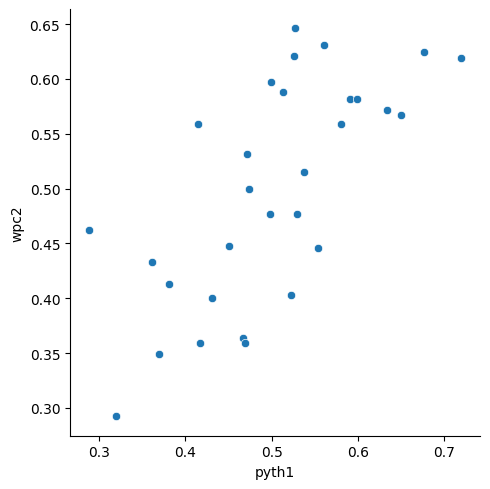

In [15]:
sns.relplot(x="pyth1", y="wpc2", data = Half2predictor)

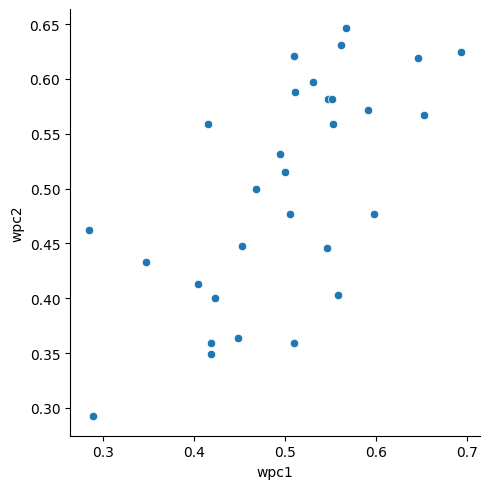

In [16]:
sns.relplot(x="wpc1", y="wpc2", data = Half2predictor)

In [17]:
keyvars = Half2predictor[['team','wpc2','wpc1','pyth1','pyth2']]
keyvars[['wpc2','wpc1','pyth1','pyth2']].corr()

,wpc2,wpc1,pyth1,pyth2
wpc2,1.000000,0.652549,0.690752,0.924473
wpc1,0.652549,1.000000,0.941082,0.577847
pyth1,0.690752,0.941082,1.000000,0.659521
pyth2,0.924473,0.577847,0.659521,1.000000


In [18]:
keyvars = keyvars.sort_values(by=['wpc2'],ascending=False)
keyvars

,team,wpc2,wpc1,pyth1,pyth2
19,OAK,0.646154,0.567010,0.527439,0.681224
15,MIL,0.630769,0.561224,0.560795,0.574983
4,BOS,0.625000,0.693878,0.675908,0.604272
26,TBA,0.621212,0.510417,0.525559,0.585571
11,HOU,0.619048,0.646465,0.719748,0.641553
9,COL,0.597015,0.531250,0.498930,0.560791
25,SLN,0.588235,0.510638,0.513494,0.589046
13,LAN,0.582090,0.552083,0.598539,0.683228
8,CLE,0.582090,0.547368,0.591158,0.649789
6,CHN,0.571429,0.591398,0.633566,0.503521
